# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [138]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 30) 
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [135]:
! pip3 install plotly


In [149]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head(40)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.00,0.00,0.0,0.000000e+00,0,0.00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.00,0.00,0.0,3.272937e+03,0,0.00,0.000,3.272937e+03,4.280196e+03,4.716127e+03,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.00,0.00,0.0,6.249755e+03,6,5128.02,0.000,6.249755e+03,1.031166e+04,1.023960e+04,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.00,0.00,0.0,1.435494e+04,0,0.00,0.000,1.435494e+04,1.508680e+04,1.390584e+04,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.00,0.00,0.0,9.151177e+04,0,0.00,0.000,9.151177e+04,9.364944e+04,9.608961e+04,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.00,0.00,0.0,9.369080e+04,0,0.00,0.000,9.369080e+04,9.898989e+04,9.313178e+04,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.00,0.00,0.0,5.350795e+03,0,0.00,0.000,5.350795e+03,6.391816e+03,6.704830e+03,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.00,0.00,0.0,4.783591e+04,0,0.00,0.000,4.783591e+04,5.080133e+04,4.881469e+04,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.00,0.00,0.0,2.919013e+06,0,0.00,0.000,2.919013e+06,3.069270e+06,2.887886e+06,0.0,0.0,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.00,32413.52,0.0,0.000000e+00,83,324947.73,22100.000,0.000000e+00,1.019396e+04,8.931475e+02,0.0,0.0,0.000000e+00,32413.52,34119.49,38051.374167,0.00,0.00,0.00000,NaN,3915.032892,4.383411,6065.052515


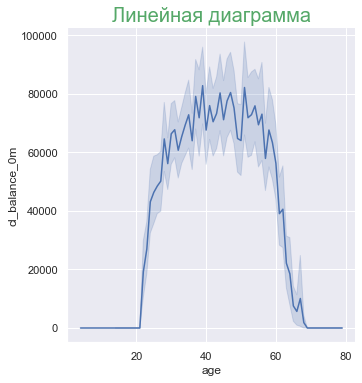

In [51]:
#Линейная диаграмма потребительского кредита по возрасту
# На графике видно что потребительский кредит у людей возрасте от 21 до 68 лет
sns.set(style = 'darkgrid')
sns.relplot(x='age', y = 'cl_balance_0m', data = df.query('age<80'), kind = 'line')
plt.title('Линейная диаграмма', size = 20, color = 'g');

In [ ]:
# В круговой диаграмме отображается процентное соотноещение мужчин и женщин. У 1,4% неизвестен пол.
# Можно конечно приблизительно узнать пол, но не хватает информации(по каким категориям товаров были сделаны покупки.)

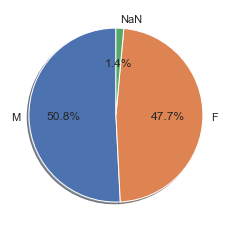

In [43]:
M=df.loc[df['gender']=='М']
F=df.loc[df['gender']=='F']
Mlen = len(M)
Flen = len(F)
Nlen=len(df)-Mlen-Flen
labels = 'M', 'F', 'NaN'
plt.pie([Mlen, Flen, Nlen], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show();

In [ ]:
#Количество трат по картам у женщин больше чем у мужчин.

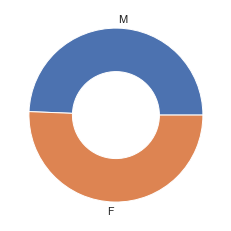

In [234]:
Mdc_trx_cnt = len(M[M.dc_trx_cnt != 0])
Fdc_trx_cnt = len(F[F.dc_trx_cnt != 0])
vals = [Mdc_trx_cnt, Fdc_trx_cnt]
labels = 'M', 'F'
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5));

In [170]:
city = df.groupby(['city_type'])['dc_trx_cnt','Avg_trx','dc_trx_sum','income'].mean();
city

<ipython-input-170-815770850c78>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dc_trx_cnt,Avg_trx,dc_trx_sum,income
city_type,,,,
100-500,115.002331,4927.095735,234040.814211,24215.240921
1M+,101.952706,4742.436657,192437.293998,19756.834504
500-1000,103.648069,4810.480433,204275.195062,25981.102657
<100,98.010051,4622.587821,181156.273981,27669.947137
Mega,108.865870,8105.497208,310832.201518,30837.141135


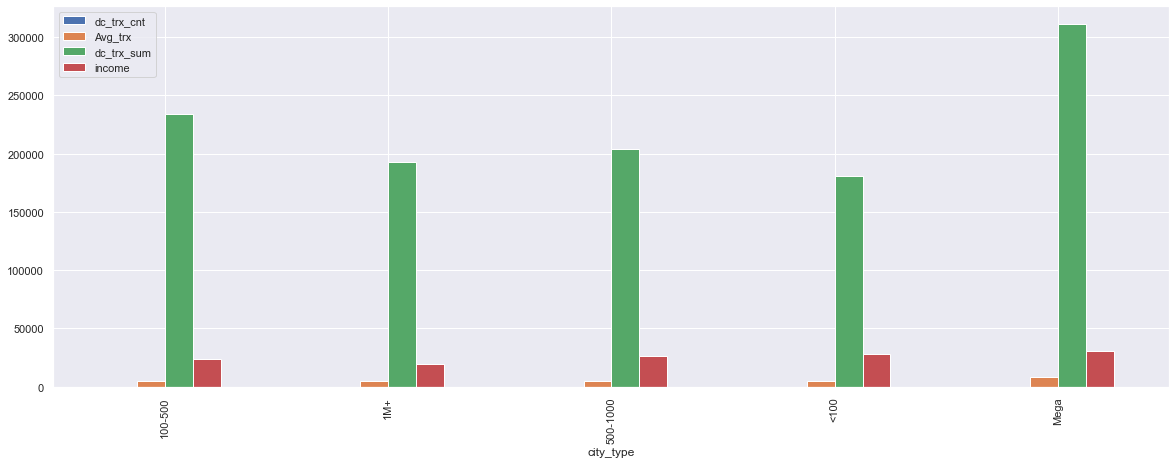

In [126]:
#Диаграмма с разбивкой по городам 
city.plot(kind='bar', figsize=(20,7));

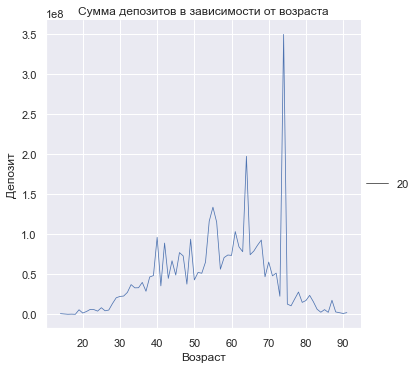

In [229]:
#График депозитов в зависимости от возраста 
age_t= df.groupby(['age'])['td_balance_0m'].sum().reset_index()
age_t = age_t.loc[age_t['td_balance_0m']!=0]
sns.relplot(x='age', y='td_balance_0m', data=age_t, kind='line', size=20, color='b')
plt.title('Сумма депозитов в зависимости от возраста');
plt.xlabel("Возраст")
plt.ylabel("Депозит");

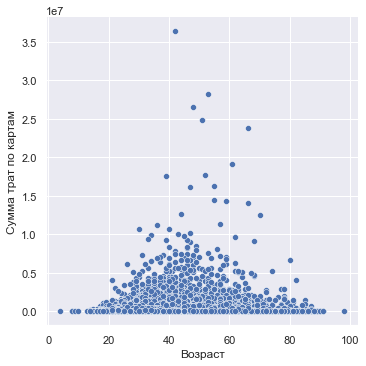

In [230]:
#разбивка графика по возрасту
sns.relplot(x='age', y='dc_trx_sum', data=df);
plt.xlabel("Возраст")
plt.ylabel("Сумма трат по картам");

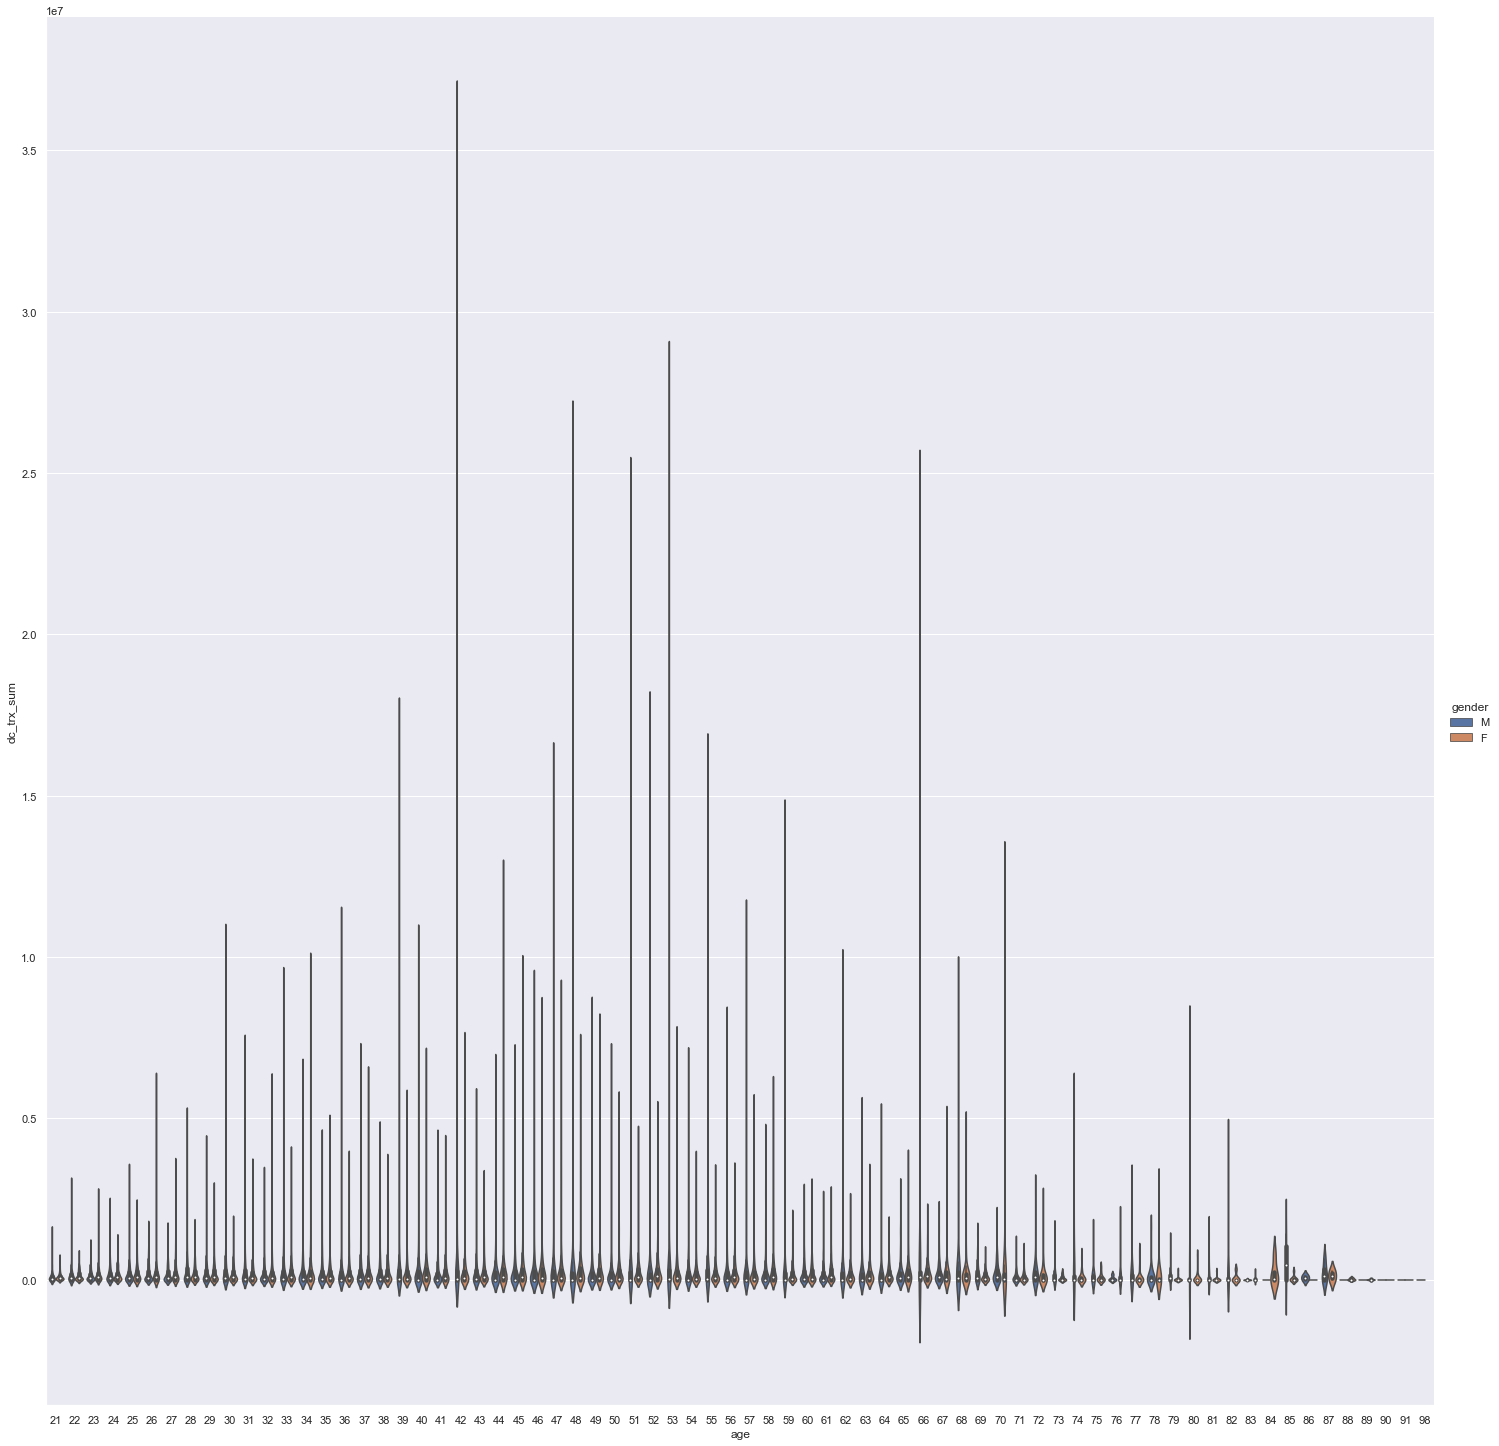

In [232]:
#График суммы трат по картам для клиентов от 20 лет(до 20 менее платежеспособные)
#Самый большой пик траты у мужчин в 42 года, у женшин в 48
sns.catplot(x="age", y="dc_trx_sum", kind="violin", hue='gender', data=df.query("age>20"), height=20);


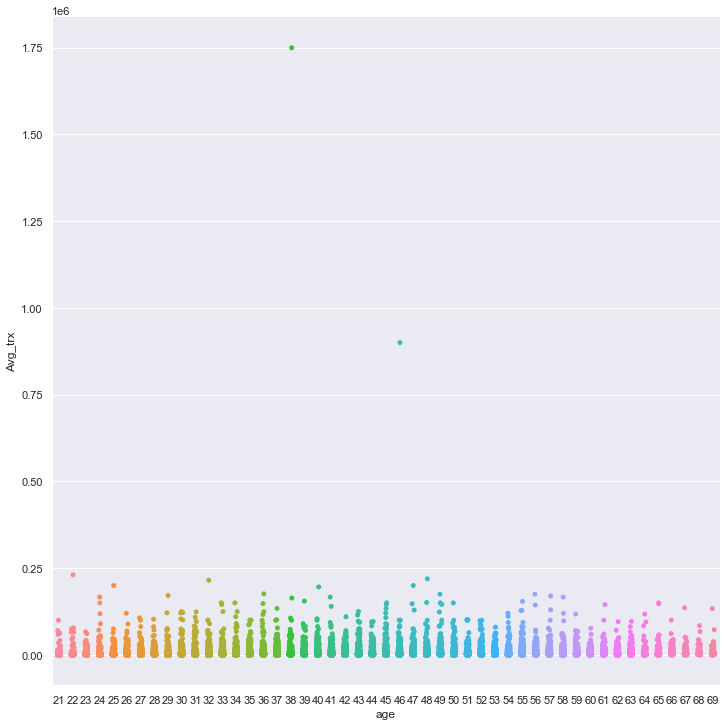

In [213]:
#средний размер транзакции от 20 до 70 средствами catplot
df1= df.loc[(df.age>20) & (df.age<70)]
sns.catplot(x='age', y='Avg_trx', data=df1, height = 10);

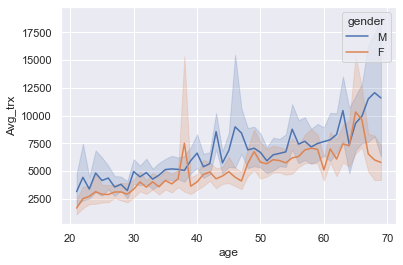

In [220]:
#Линейная диаграмма среднего размера транзакции мужчин и женщин 
sns.lineplot(x="age", y="Avg_trx", hue="gender", data=df1);
